# Code Used for Data Analysis Project

**File:** ITEC4230_CarDB.ipynb

**Course:** ITEC4230 Data Warehouse
    

## Import necessary programs and libraries

In [19]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import missingno as msno

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

In [20]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Data Collection and Preprocessing

The purpose is to extract and preprocess the dataset to convert it to the training data

### Data Extraction

In [21]:
# Imports the training data
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
# Imports the second training data for manipulation
df2 = pd.read_csv('car data.csv')
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Cleaning and Pre-processing

We first have to check our dataset for any missing values and handle them, then we validate the data types in each of the columns.  We then check the attributes to detect which ones can reasonably provide the insight that we are looking for (feature selection).

In [23]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.
# This is to call a function about missing values

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [24]:
trn_missing = missing_values_table(df)
trn_missing

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<Axes: >

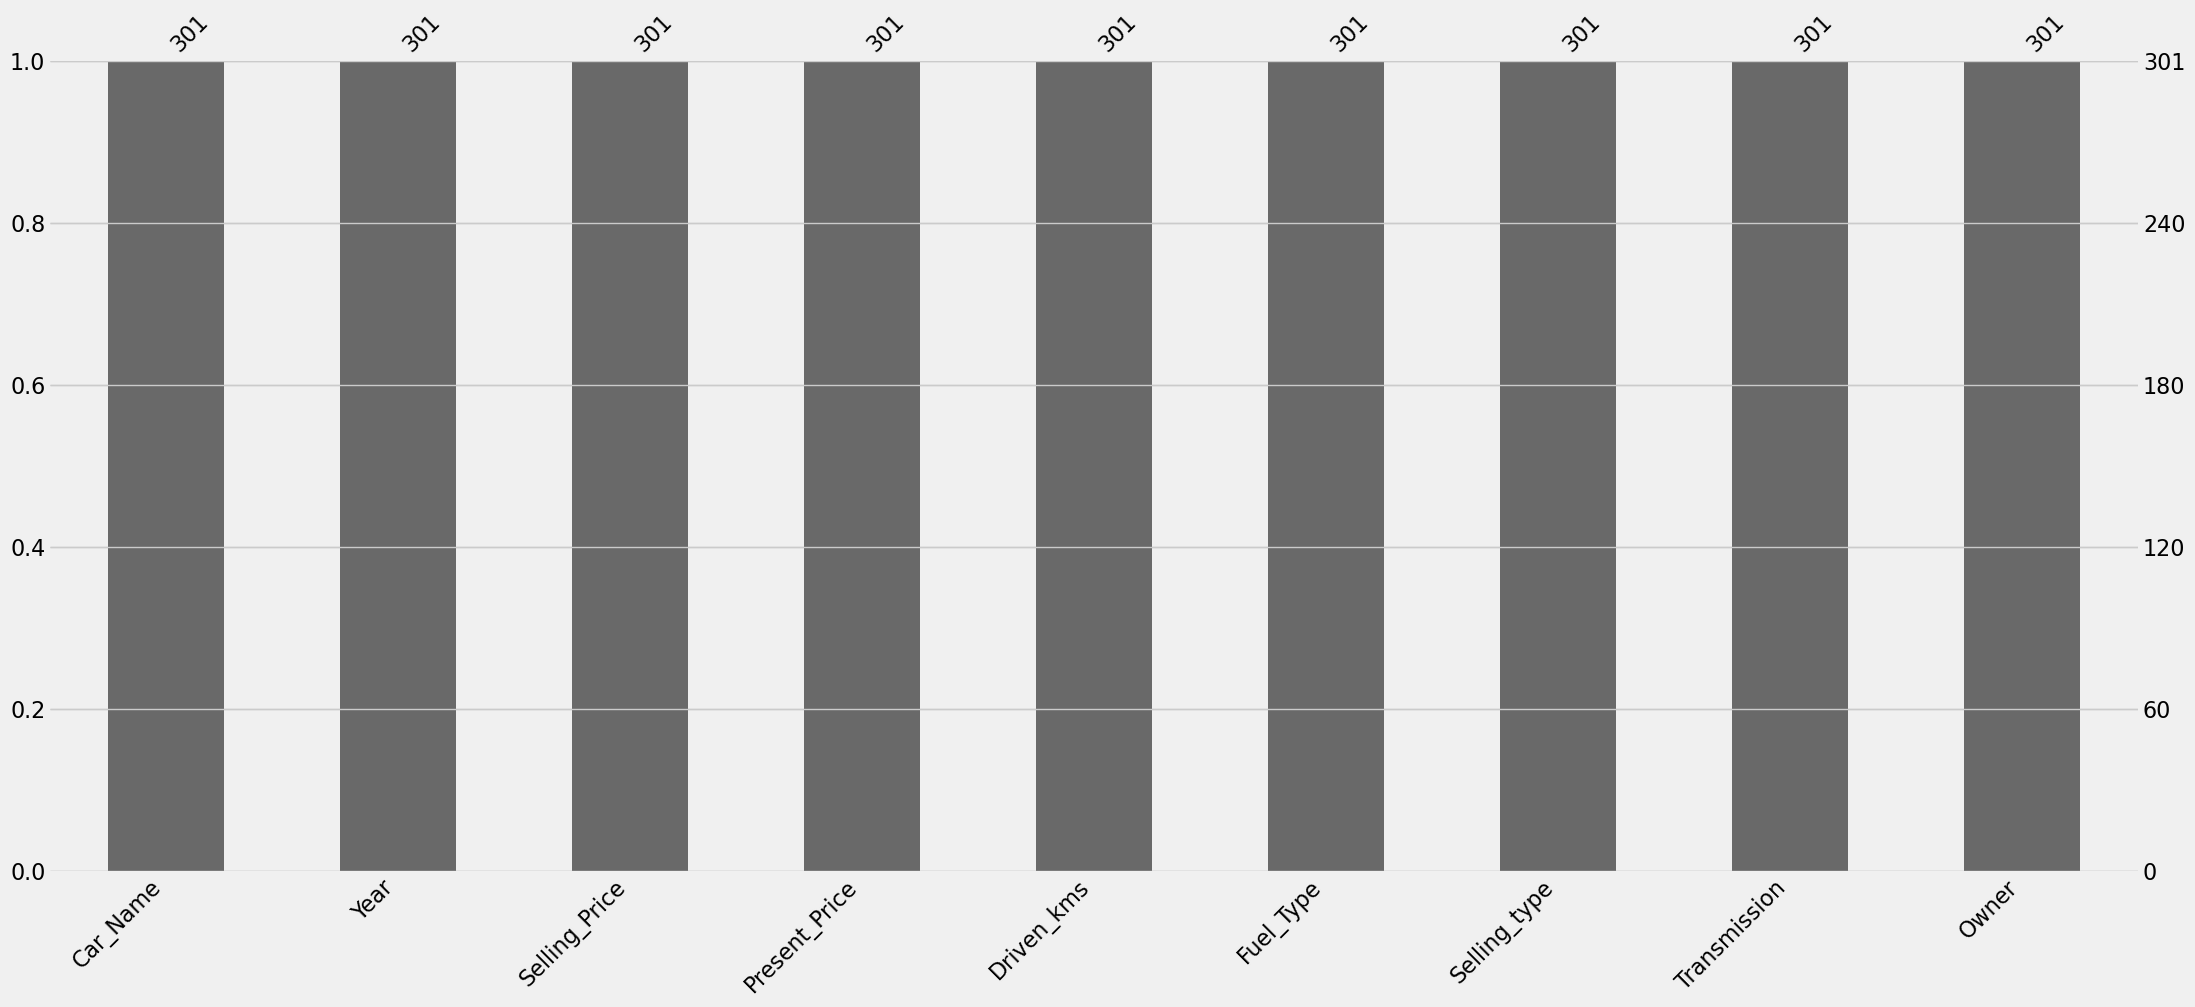

In [25]:
msno.bar(df)

Since there is no missing values and none of the columns have 100 percent total missing values, no columns can be removed.

## Feature Engineering

In [26]:
# Creating a new feature called 'Car_age', It's important to know how many years old the car is.
df['Car_age'] = 2023-df['Year']
df.drop('Year',axis=1,inplace=True)

In [27]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


## Data Exploration - Explore all possible algorithms

### 1. Data Visualization

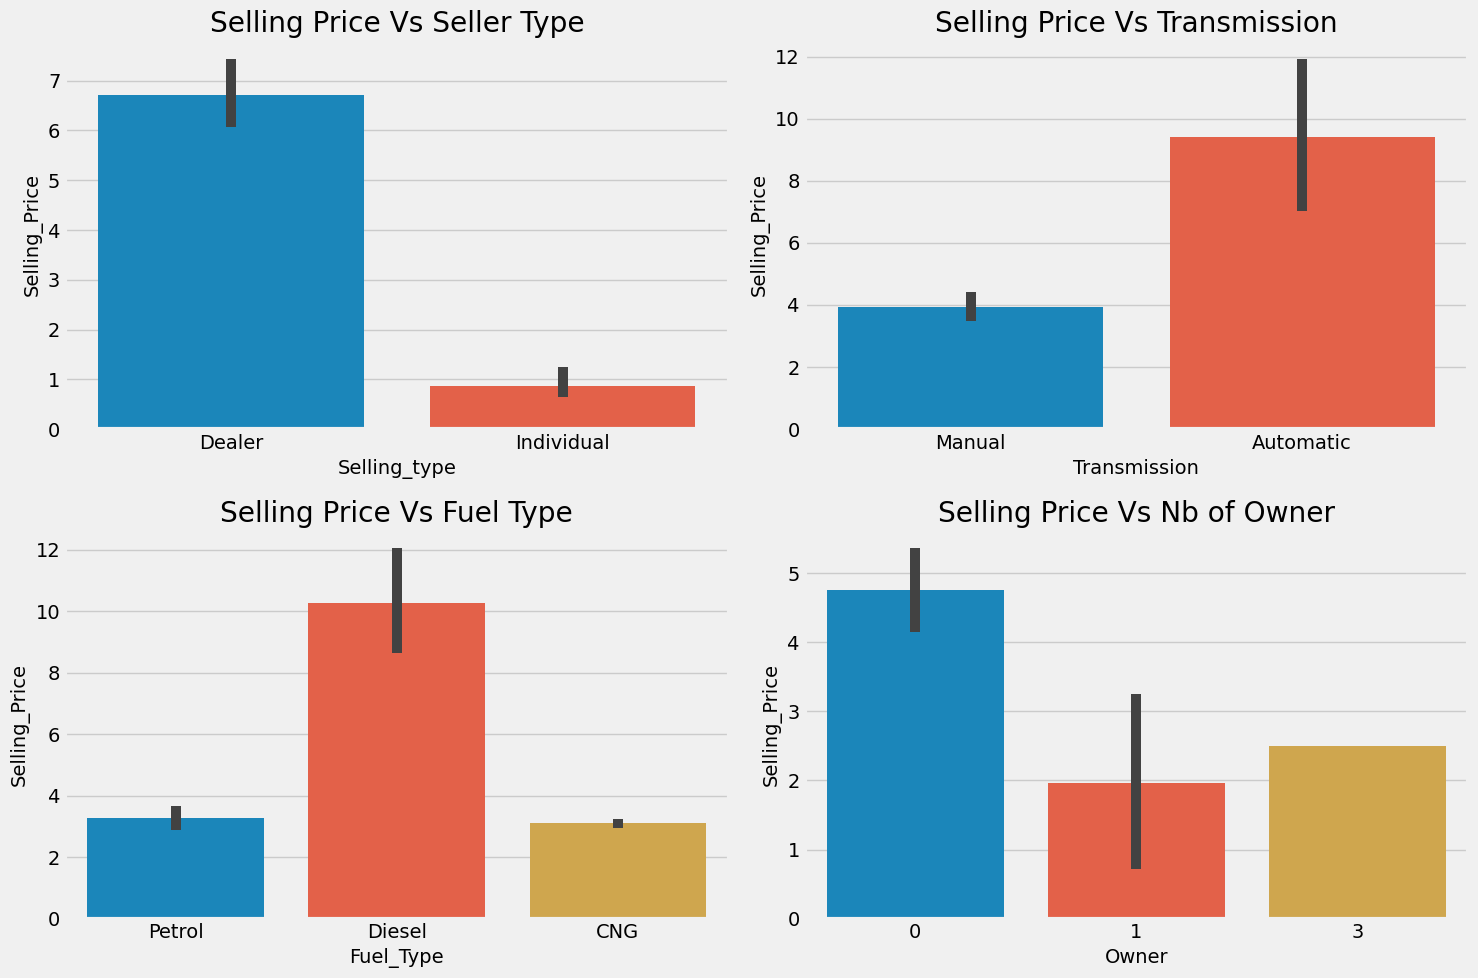

In [28]:
# Seller Type, Transmission and Fuel Type Visualization with target variable
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Selling_type',y='Selling_Price')
plt.title('Selling Price Vs Seller Type')

plt.subplot(2,2,2)
sns.barplot(data=df,x='Transmission',y='Selling_Price')
plt.title('Selling Price Vs Transmission')

plt.subplot(2,2,3)
sns.barplot(data=df,x='Fuel_Type',y='Selling_Price')
plt.title('Selling Price Vs Fuel Type')

plt.subplot(2,2,4)
sns.barplot(data=df,x='Owner',y='Selling_Price')
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()

#### Observations
* We have higher Selling Price when sold by Dealers compared to Individuals
* Selling Price would be higher for cars that are Automatic.
* Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG
* Selling Price is high with less Owners used Cars

Text(0.5, 1.0, 'Selling Price Vs Car Age')

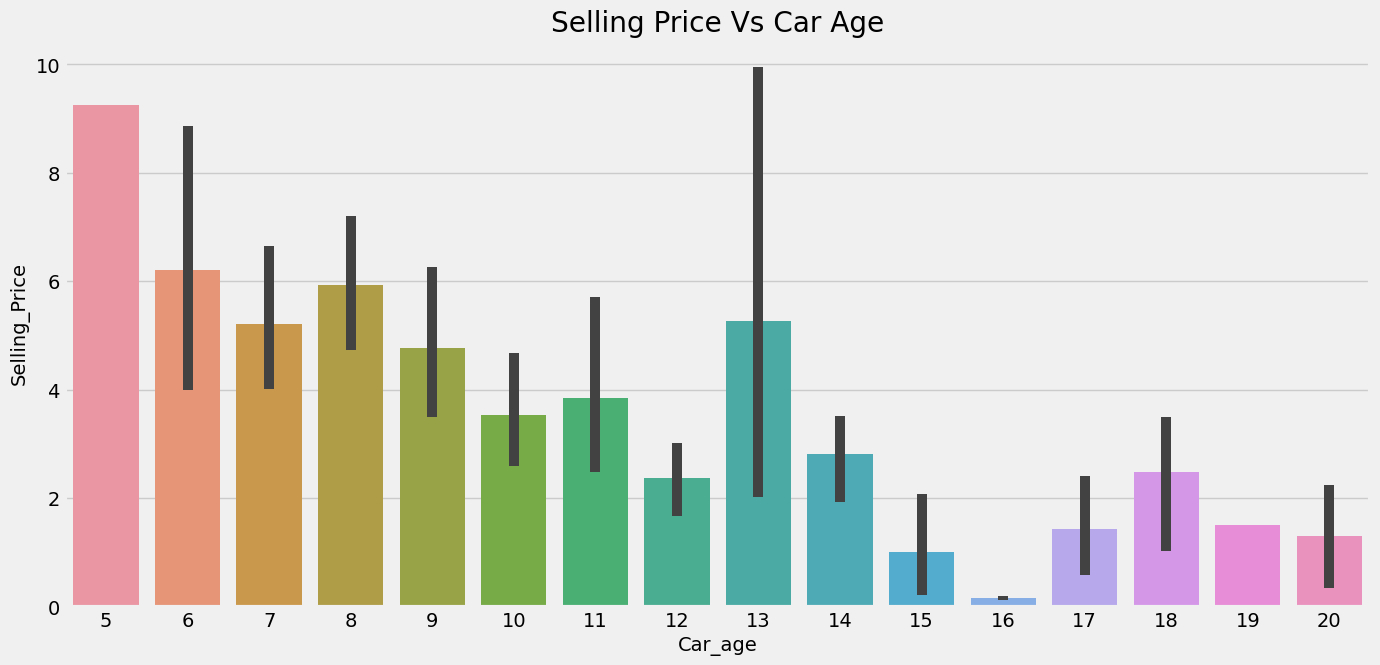

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Car_age',y='Selling_Price')
plt.title('Selling Price Vs Car Age')

#### Observations
* Selling Price of cars 5 years old would be high and gradually decreases with car of 20 years old 

## Feature Selection

### Converting categorical data to binary data

In [30]:
# display categorical output
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
df2['Fuel_Type_b'] = pd.factorize(df2['Fuel_Type'])[0]
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Fuel_Type_b
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1


In [32]:
print(df.columns)

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Car_age'],
      dtype='object')


In [33]:
df2['Selling_type_b'] = pd.factorize(df2['Selling_type'])[0]
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Fuel_Type_b,Selling_type_b
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0


In [34]:
df2['Transmission_b'] = pd.factorize(df2.Transmission)[0]
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Fuel_Type_b,Selling_type_b,Transmission_b
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,0


In [35]:
#split dataset in features and target variable
# Split dataset into training set and test set
X = df2.drop(columns=['Car_Name','Fuel_Type','Selling_type','Transmission'])
y = df2['Transmission_b']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [37]:
X

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_b,Selling_type_b,Transmission_b
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,0,1,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,0,1,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,0,1,0,0


## Decision Tree Classification

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Accuracy Evaluation: 

In [39]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


## Logistic Regression

In [40]:
# import the class
from sklearn.linear_model import LogisticRegression

In [41]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

### Confusion Matrix Evaluation: 

In [42]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[79,  0],
       [ 0, 12]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

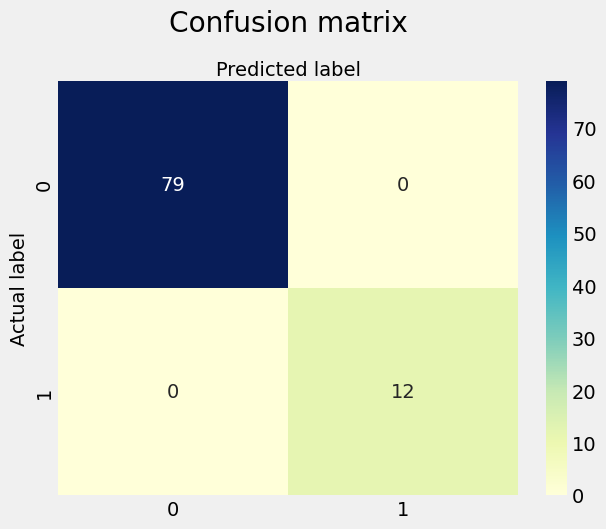

In [43]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC Curve:

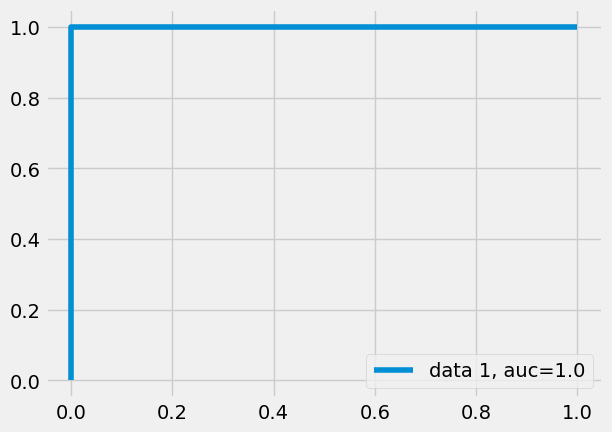

In [44]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()